# K-Mean on PM 2.5 and Numeric Weather data

#### AUTHOR: AVINASH BAGUL

IMPORTING ESSENTIAL LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.mixture import GaussianMixture
import seaborn as sns
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D
import itertools
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

READING DATASET

In [2]:
df1 = pd.read_csv('iqr_benchmark.csv', parse_dates=['Time_stamp'], index_col=['Time_stamp'])
df1 = df1[df1['boxName']=='Bernem']
df = df1.iloc[:,:-7]
df = df.drop(df.iloc[:,0:1], axis = 1)
df

,PM 2.5,temp,pressure,humidity,wind_speed
Time_stamp,,,,,
2018-12-31 18:30:53,139.63,7.71,1032,100,3.09
2018-12-31 18:35:01,136.43,7.71,1032,100,3.09
2018-12-31 18:39:09,112.67,7.71,1032,100,3.09
2018-12-31 18:43:17,46.87,7.71,1032,100,3.09
2018-12-31 18:47:24,38.30,7.71,1032,100,3.09
...,...,...,...,...,...
2020-02-28 18:11:12,3.93,6.00,1013,56,3.60
2020-02-28 18:14:31,4.33,6.00,1013,56,3.60
2020-02-28 18:21:01,3.93,6.00,1013,56,3.60


In [3]:
data = df
data.head(5)

,PM 2.5,temp,pressure,humidity,wind_speed
Time_stamp,,,,,
2018-12-31 18:30:53,139.63,7.71,1032,100,3.09
2018-12-31 18:35:01,136.43,7.71,1032,100,3.09
2018-12-31 18:39:09,112.67,7.71,1032,100,3.09
2018-12-31 18:43:17,46.87,7.71,1032,100,3.09
2018-12-31 18:47:24,38.30,7.71,1032,100,3.09


CHECKING FOR NULL VALUES IN THE DATASET

In [4]:
data.isnull().sum()

PM 2.5        0
temp          0
pressure      0
humidity      0
wind_speed    0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 162173 entries, 2018-12-31 18:30:53 to 2020-02-28 18:27:11
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   PM 2.5      162173 non-null  float64
 1   temp        162173 non-null  float64
 2   pressure    162173 non-null  int64  
 3   humidity    162173 non-null  int64  
 4   wind_speed  162173 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 7.4 MB


DATA DESCRIPTION

In [6]:
data.describe()

,PM 2.5,temp,pressure,humidity,wind_speed
count,162173.000000,162173.000000,162173.000000,162173.000000,162173.000000
mean,10.105528,10.009526,1015.129874,74.737126,3.724411
std,13.645995,7.802402,10.767220,19.187474,2.249251
min,0.430000,-8.910000,976.000000,14.000000,0.310000
25%,3.270000,4.290000,1008.000000,63.000000,2.100000
50%,6.200000,8.400000,1015.000000,80.000000,3.600000
75%,13.070000,15.040000,1022.000000,92.000000,5.100000
max,838.670000,39.280000,1046.000000,100.000000,17.490000


## Feature Correlations

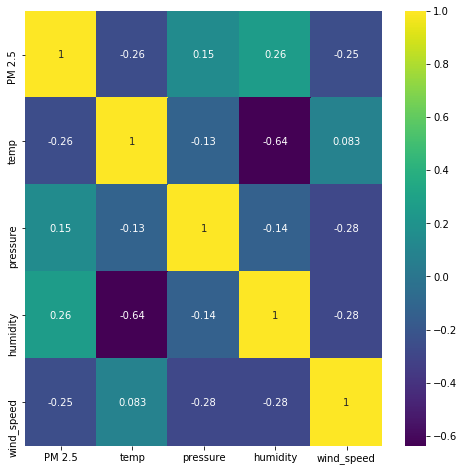

In [7]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(),annot=True, cmap='viridis' )

## Distribution Plots

PM 2.5 DISTRIBUTION

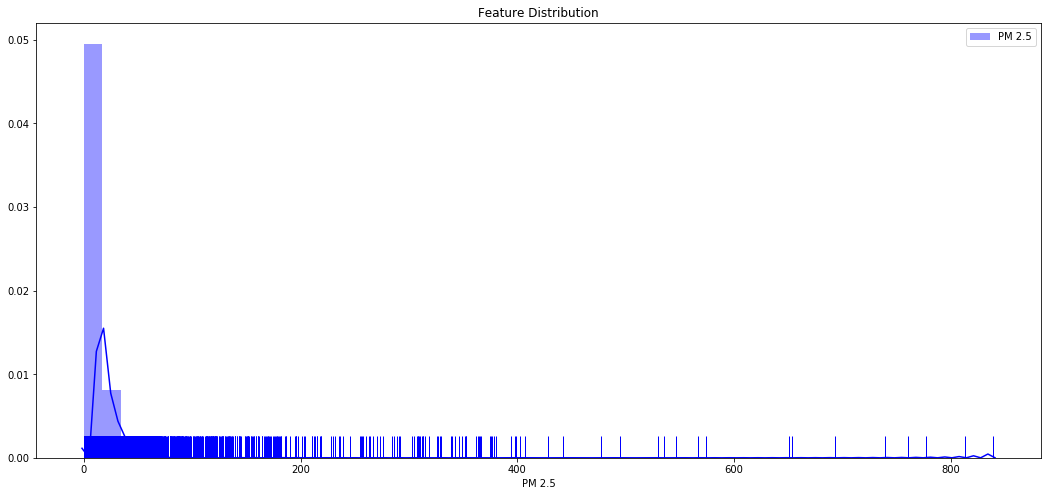

In [8]:
plt.figure(figsize=(18,8))
sns.distplot(data["PM 2.5"],color="b",rug=True, label="PM 2.5")
plt.legend()
plt.title("Feature Distribution")
plt.show()

TEMPERATURE DISTRIBUTION

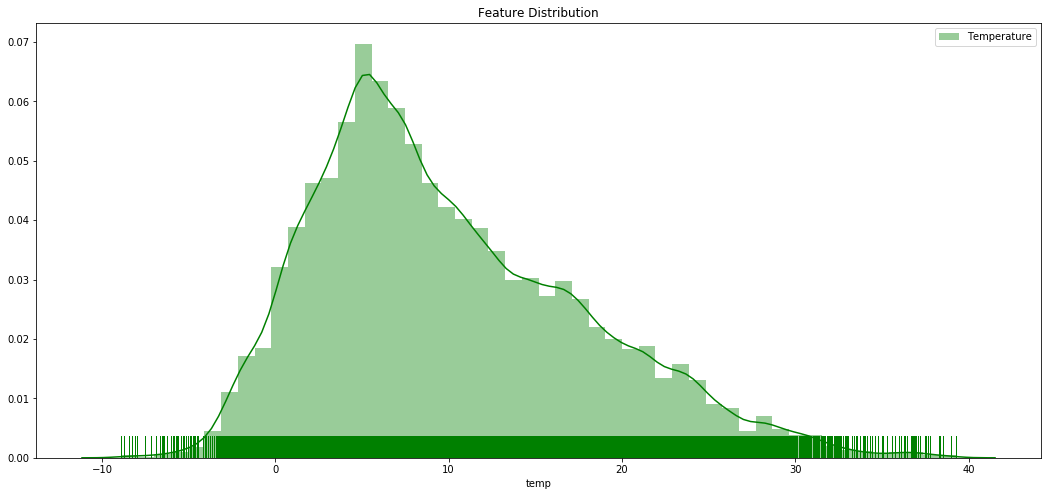

In [9]:
plt.figure(figsize=(18,8))
sns.distplot(data["temp"],color="g",rug=True, label="Temperature")
plt.legend()
plt.title("Feature Distribution")
plt.show()

PRESSURE DISTRIBUTION

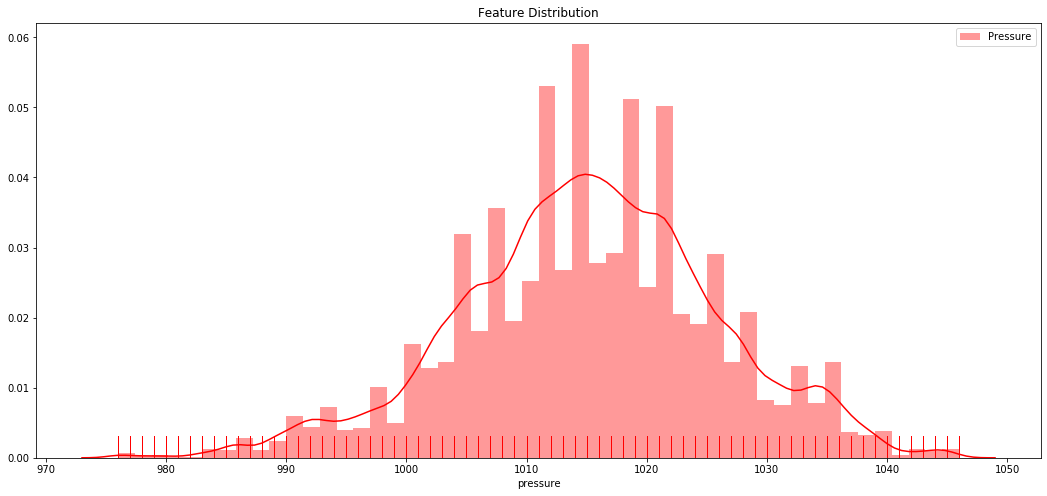

In [10]:
plt.figure(figsize=(18,8))
sns.distplot(data["pressure"],color="r",rug=True, label="Pressure")
plt.legend()
plt.title("Feature Distribution")
plt.show()

HUMIDITY DISTRIBUTION

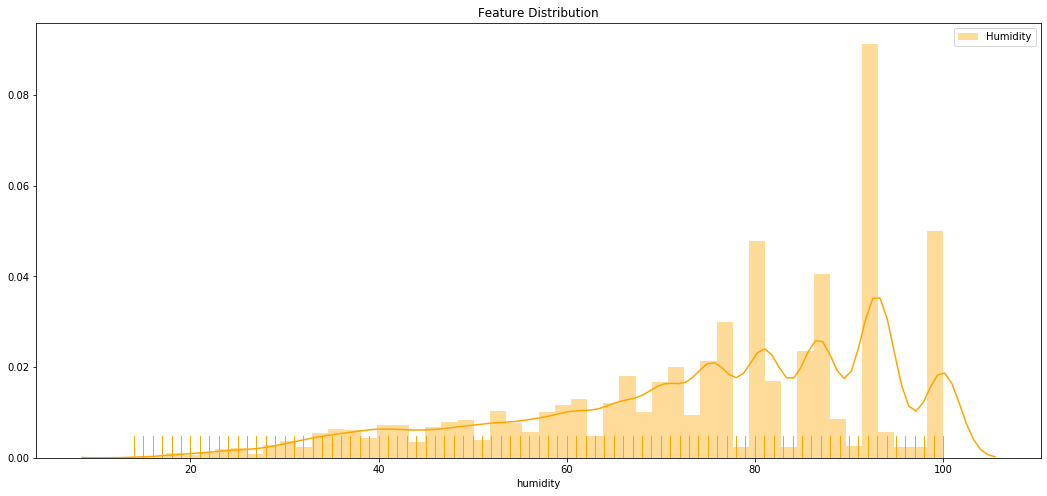

In [11]:
plt.figure(figsize=(18,8))
sns.distplot(data["humidity"],color="orange",rug=True, label="Humidity")
plt.legend()
plt.title("Feature Distribution")
plt.show()

WIND SPEED DISTRIBUTION

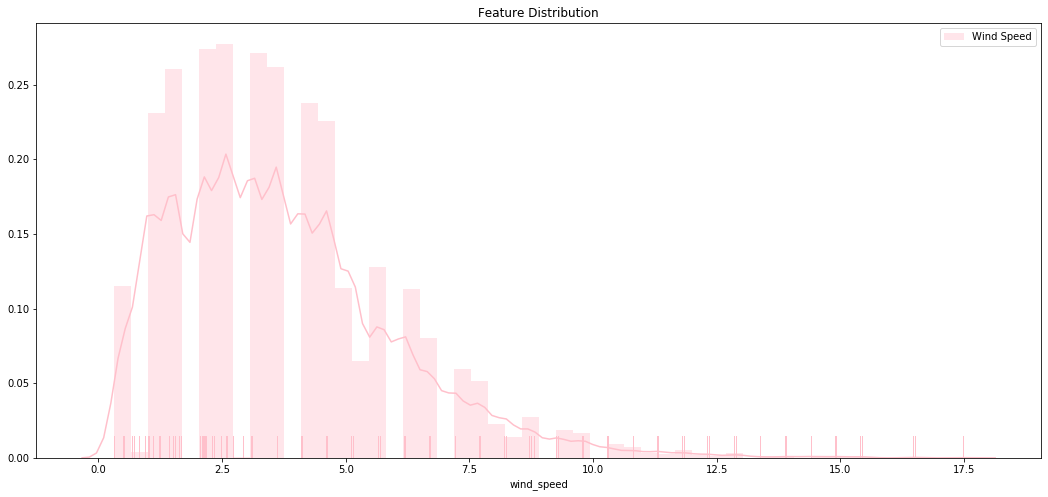

In [12]:
plt.figure(figsize=(18,8))
sns.distplot(data["wind_speed"],color="pink",rug=True, label="Wind Speed")
plt.legend()
plt.title("Feature Distribution")
plt.show()

## Pair Plot

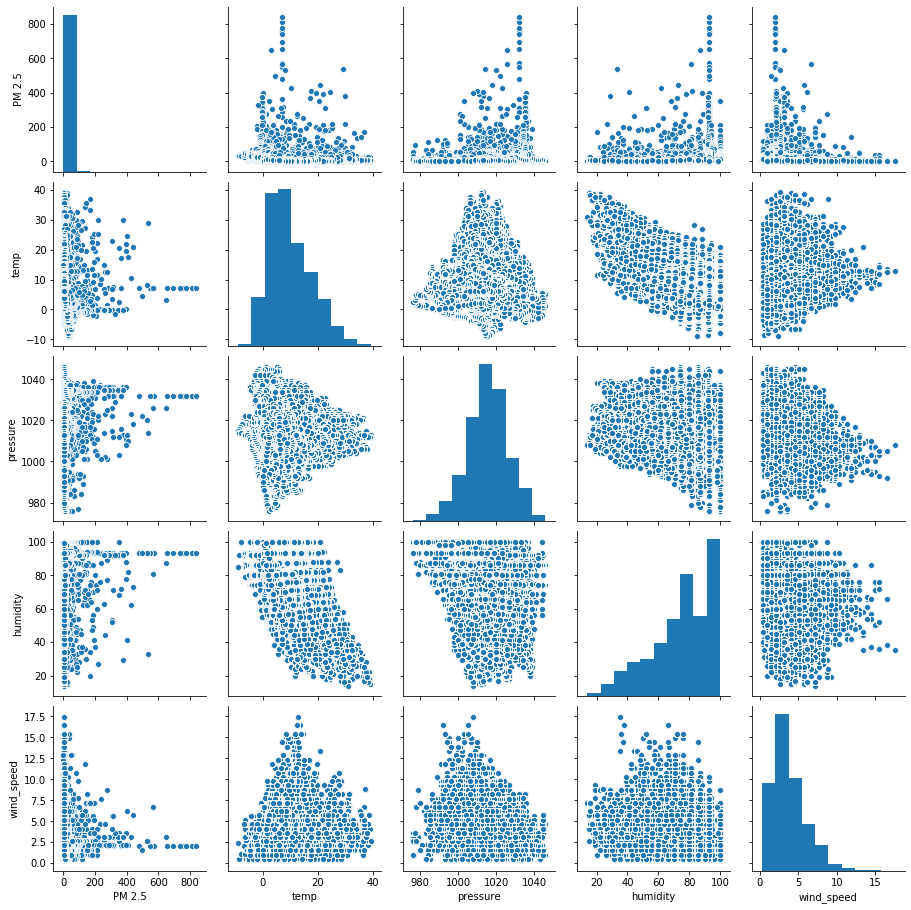

In [13]:
sns.pairplot(data)

# Finding optimal number of clusters

In [14]:
sum_of_squared_distances = []
iterations = []
for k in range(1,15):
    kmn = KMeans(n_clusters=k,random_state=41)
    kmn = kmn.fit(data)
    sum_of_squared_distances.append(kmn.inertia_)
    iterations.append(kmn.n_iter_)

## Elbow Method to find optimal number of K

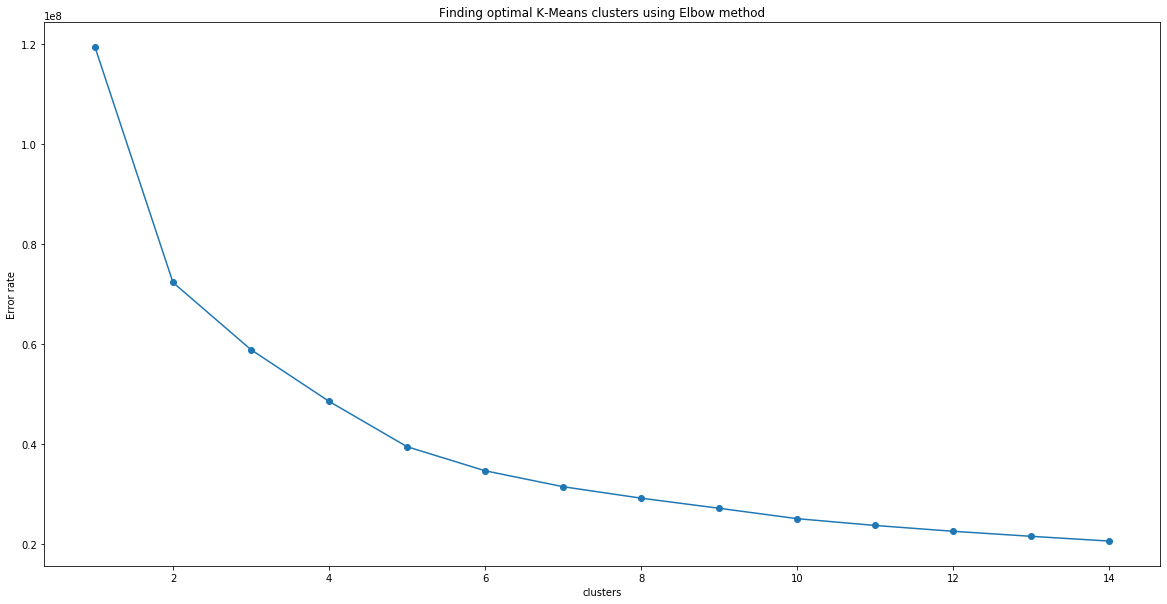

In [15]:
plt.figure(figsize=(20,10))
plt.plot(range(1, 15), sum_of_squared_distances,'o-')
plt.title('Finding optimal K-Means clusters using Elbow method')
plt.xlabel('clusters')
plt.ylabel('Error rate')
plt.show()

from above elbow method and plot, it can be seen that efficient number of clusters can be 4,5,6

### K-Mean
#### K = 6

In [16]:
k=6 # K number of clusters
kmean1 = KMeans(n_clusters = k, init='k-means++',n_init=10,verbose=0, random_state=42, algorithm='elkan')
data1 = data.iloc[:,[0,1,2,3,4]].values
kmean1.fit(data1)
print("number of iterations", kmean1.n_iter_)
print(kmean1)

number of iterations 29
KMeans(algorithm='elkan', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)


In [17]:
clusters = kmean1.cluster_centers_
print(clusters)

[[   5.69593353   20.81842019 1017.70546225   40.42701303    4.21774564]
 [   7.54358699    8.77698582 1004.80984895   88.53730131    3.86955651]
 [  31.78246902    3.02169832 1019.19976838   92.41430226    2.26986103]
 [   9.97486971    4.61971634 1025.54774191   84.59251899    2.71070034]
 [ 347.79680412    6.4856701  1026.78350515   83.81443299    3.0928866 ]
 [   6.0192094    11.65049325 1015.31720493   66.09695831    4.6081421 ]]


In [18]:
km = kmean1.fit_predict(data1)

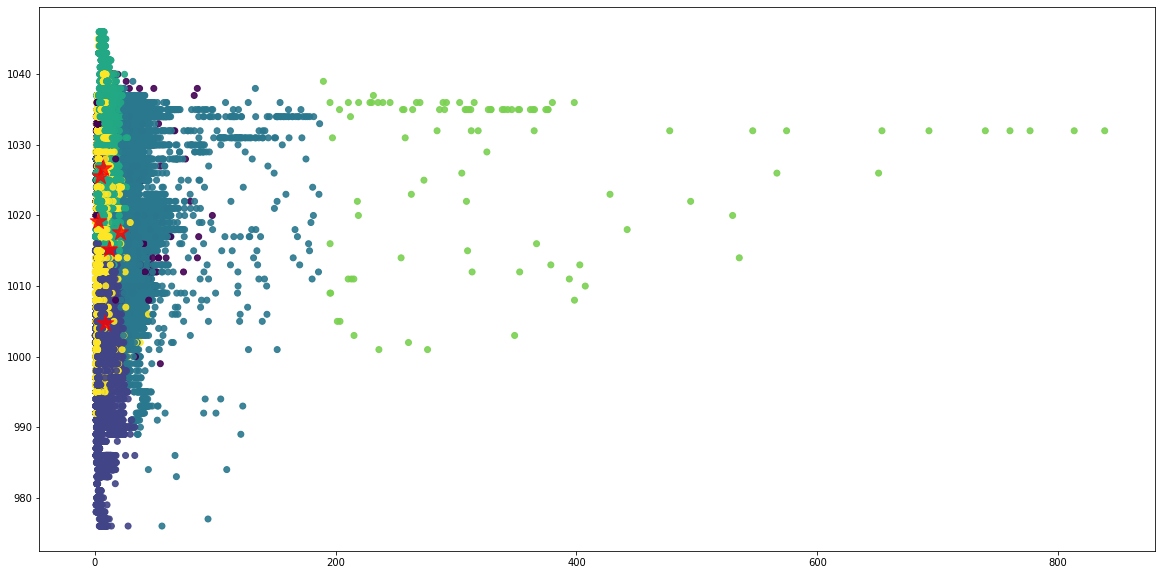

In [19]:
plt.figure(figsize=(20,10))
plt.scatter(data1[:,0],data1[:,2],c=km,alpha=0.9, cmap='viridis')

# plot the centroids
plt.scatter(kmean1.cluster_centers_[:, 1], kmean1.cluster_centers_[:, 2], s=300, marker='*', c='red',alpha=0.8)

## K=5

In [20]:
k=5 # K number of clusters
kmean2 = KMeans(n_clusters = k, init='k-means++',n_init=10,verbose=0, random_state=42, algorithm='elkan')
data2 = data.iloc[:,[0,1,2,3,4]].values
kmean2.fit(data2)
print("number of iterations", kmean2.n_iter_)
print(kmean2)

number of iterations 14
KMeans(algorithm='elkan', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)


In [21]:
clusters1 = kmean2.cluster_centers_
print(clusters1)

[[   5.78224712   20.01581027 1017.547129     42.38014127    4.29806584]
 [  22.53269112    2.95390962 1023.50295441   90.98680464    2.25515017]
 [   6.33879593   10.05392601 1017.4542671    69.90016772    4.2880683 ]
 [ 330.86972222    7.02092593 1026.28703704   82.17592593    3.07731481]
 [   7.64376805    8.61734677 1005.54121598   88.62063992    3.76941529]]


In [22]:
KM = kmean2.fit_predict(data2)

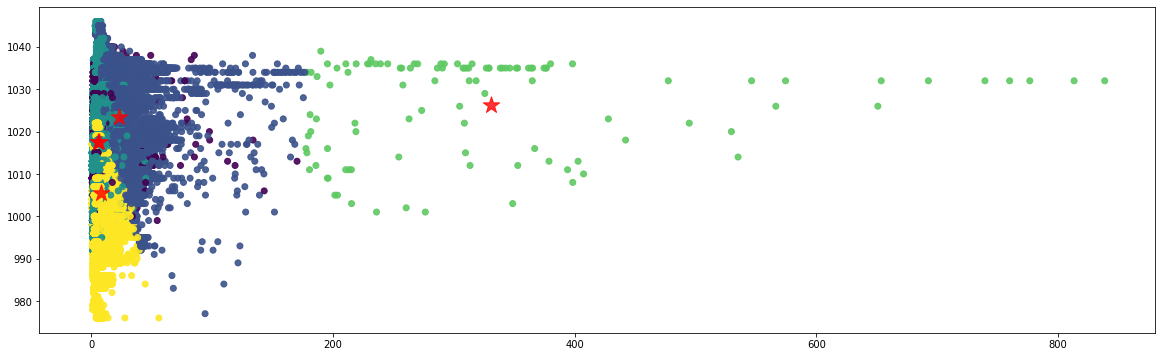

In [23]:
plt.figure(figsize=(20,6))
plt.scatter(data2[:,0],data2[:,2],c=KM,alpha=0.9, cmap='viridis')

# plot the centroids
plt.scatter(kmean2.cluster_centers_[:, 0], kmean2.cluster_centers_[:, 2], s=300, marker='*', c='red',alpha=0.8)

## K=4

In [24]:
k=4 # K number of clusters
kmean3 = KMeans(n_clusters = k, init='k-means++',n_init=10,verbose=0, random_state=42, algorithm='elkan')
data3 = data.iloc[:,[0,1,2,3,4]].values
kmean3.fit(data3)
print("number of iterations", kmean3.n_iter_)
print(kmean3)

number of iterations 11
KMeans(algorithm='elkan', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)


In [25]:
clusters1 = kmean3.cluster_centers_
print(clusters1)

[[   5.83595089   19.94460163 1017.70366683   42.65667828    4.28767944]
 [  14.91701816    5.98722511 1014.07804197   91.42952605    2.84129211]
 [   6.22465812    9.69402094 1015.0349403    71.644883      4.43561446]
 [ 311.22146341    6.88073171 1026.56097561   81.82113821    3.01260163]]


In [26]:
KMN = kmean3.fit_predict(data3)

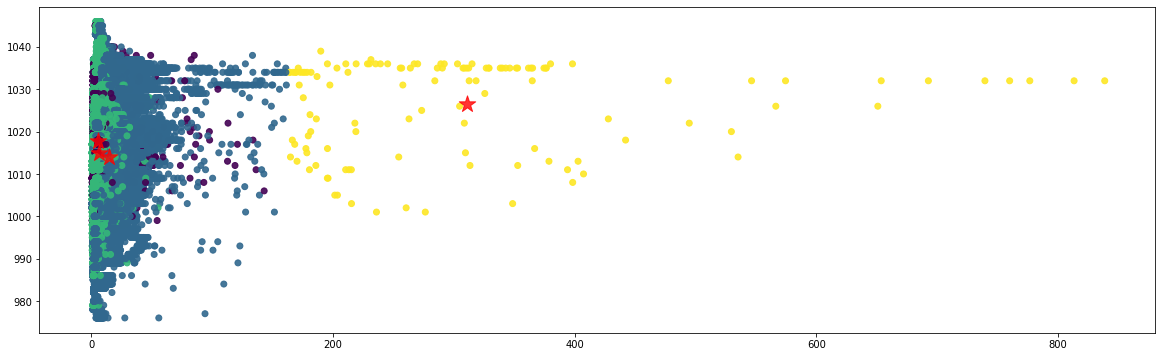

In [27]:
plt.figure(figsize=(20,6))
plt.scatter(data3[:,0],data3[:,2],c=KMN,alpha=0.9, cmap='viridis')

# plot the centroids
plt.scatter(kmean3.cluster_centers_[:, 0], kmean3.cluster_centers_[:, 2], s=300, marker='*', c='red',alpha=0.8)

In [28]:
cluster_dict = []

for i in KMN:
    cluster_dict.append(i)

In [29]:
cluster_dict

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,


In [30]:
data['clusters'] = cluster_dict

In [31]:
data

,PM 2.5,temp,pressure,humidity,wind_speed,clusters
Time_stamp,,,,,,
2018-12-31 18:30:53,139.63,7.71,1032,100,3.09,1
2018-12-31 18:35:01,136.43,7.71,1032,100,3.09,1
2018-12-31 18:39:09,112.67,7.71,1032,100,3.09,1
2018-12-31 18:43:17,46.87,7.71,1032,100,3.09,1
2018-12-31 18:47:24,38.30,7.71,1032,100,3.09,1
...,...,...,...,...,...,...
2020-02-28 18:11:12,3.93,6.00,1013,56,3.60,2
2020-02-28 18:14:31,4.33,6.00,1013,56,3.60,2
2020-02-28 18:21:01,3.93,6.00,1013,56,3.60,2


In [32]:
data.describe()

,PM 2.5,temp,pressure,humidity,wind_speed,clusters
count,162173.000000,162173.000000,162173.000000,162173.000000,162173.000000,162173.000000
mean,10.105528,10.009526,1015.129874,74.737126,3.724411,1.200964
std,13.645995,7.802402,10.767220,19.187474,2.249251,0.730574
min,0.430000,-8.910000,976.000000,14.000000,0.310000,0.000000
25%,3.270000,4.290000,1008.000000,63.000000,2.100000,1.000000
50%,6.200000,8.400000,1015.000000,80.000000,3.600000,1.000000
75%,13.070000,15.040000,1022.000000,92.000000,5.100000,2.000000
max,838.670000,39.280000,1046.000000,100.000000,17.490000,3.000000


In [33]:
c0 = data[data['clusters']==0]
c1 = data[data['clusters']==1]
c2 = data[data['clusters']==2]
c3 = data[data['clusters']==3]

In [34]:
line = ('+---------------+--------------+--------------+----------------+---------------+---------------+--------------+--------------+----------------+')

FUNCTION TO FIND OUTLIERS IN THE K-MEANS CLUSTERS

In [35]:
def detect_outlier(data_1):
    outliers=[]
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
      
      
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return len(outliers)


### Function get_label()

def get_label(data):
  ####### For Work day and Morning hours, finding outliers/anomalies with the help of box plot

  #------- wd_mh = wd[wd['Time of Day']=='Morning_Hours']

  # data ---- is selected data based on contextual parameters i.e. time of day and week days

  ##### now we have separated values for PM 2.5 for Morning Hours and 
    print('checkpoint 1')

    outlier_datapoints = detect_outlier(data['PM 2.5'])
    print("\n\n##########################################\n Number of Z-score Outliers in PM 2.5 are: " , outlier_datapoints,'\n##########################################\n\n')

    print('\n\n',line,'\n\n')

  ### outliers with 25 and 75 quartile method:

    sorted_val = sorted(data['PM 2.5'])

    q1, q3 = np.percentile(sorted_val,[25,75])
    qr = q3-q1

    lower_bound = q1 - (1.5 * qr)
    upper_bound = q3 + (1.5 * qr)

    otl = 0

    for i in sorted_val:
        if i > upper_bound:
            otl +=1
    print('Number of outliers using quartile method\n')
    print('\nlower bound: ', lower_bound, 'and Upper bound: ', upper_bound)
    print(otl,' Number of outliers from ', len(sorted_val),'PM 2.5 values')

  ### Visualizing outliers with the help of box plot:

    plt.figure(figsize=(25,10))
    scale_factor = 10
  #xmin, xmax = plt.xlim()
  #plt.xlim(xmin * scale_factor, xmax * scale_factor)
    sns.set(font_scale=1.3,style='whitegrid', palette="deep")
    ax = sns.boxplot(x="PM 2.5", data=data, dodge=False, notch=True)
    plt.show()

  ### taking upper bound from quartilemethod as our upper limit and everyting beyond that point is anomalous behaviour in that period.

    label_dict = []
    x = data['PM 2.5'].values

    print(x)

    for i in x :
        if i > upper_bound or i < lower_bound:
            label_dict.append('abnormal')
        else:
            label_dict.append('normal')

    data['label'] = label_dict
  
    return data

checkpoint 1


##########################################
 Number of Z-score Outliers in PM 2.5 are:  454 
##########################################




 +---------------+--------------+--------------+----------------+---------------+---------------+--------------+--------------+----------------+ 


Number of outliers using quartile method


lower bound:  -3.895 and Upper bound:  13.425
2190  Number of outliers from  30135 PM 2.5 values


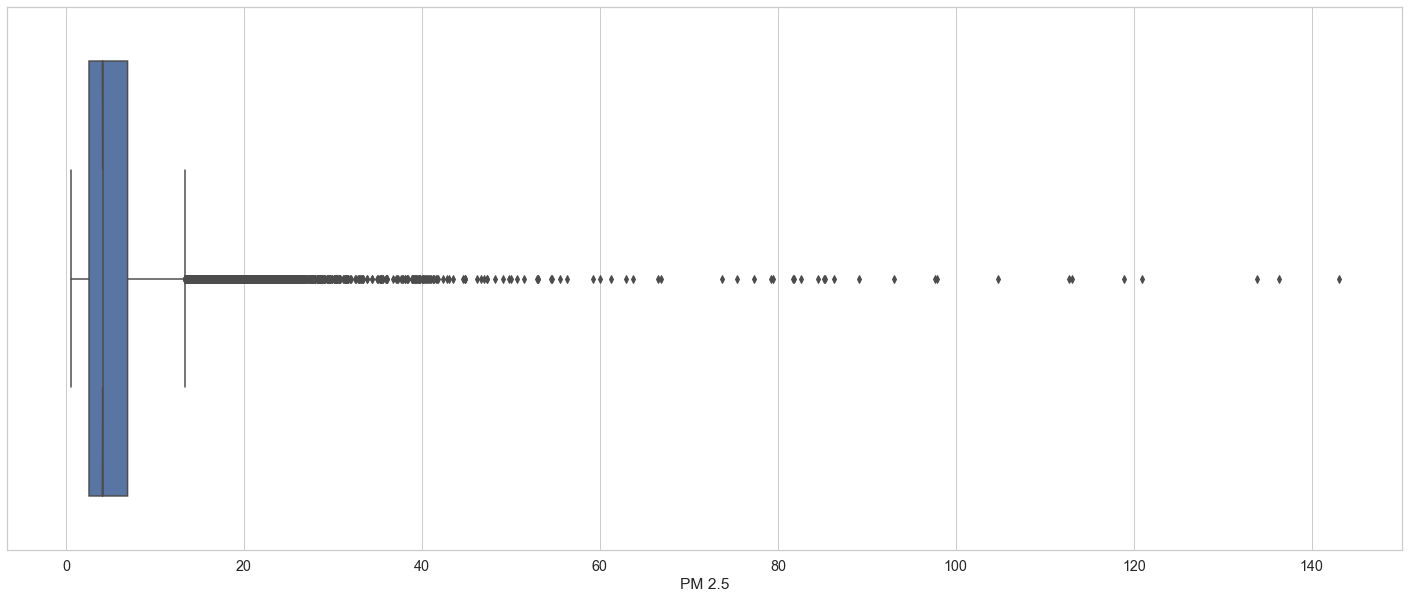

[2.53 2.   2.6  ... 3.6  3.07 3.5 ]


 +---------------+--------------+--------------+----------------+---------------+---------------+--------------+--------------+----------------+ 


                     PM 2.5   temp  pressure  humidity  wind_speed  clusters  \
Time_stamp                                                                     
2019-01-02 14:48:11   23.50   5.35      1031        45        6.69         0   
2019-01-02 16:10:49   27.43   3.56      1033        48        4.12         0   
2019-01-02 17:12:52   29.40   2.85      1034        48        5.66         0   
2019-02-14 15:02:50   18.17  10.64      1034        50        1.03         0   
2019-02-14 15:06:57   17.73  10.64      1034        50        1.03         0   
...                     ...    ...       ...       ...         ...       ...   
2020-02-05 11:01:17   13.47   6.27      1032        52        4.10         0   
2020-02-16 17:25:27   17.33  15.05      1008        42       11.80         0   
2020-02-16 18:

In [36]:
c0 = get_label(c0)

print('\n\n', line,'\n\n')
print(c0[c0['label']=='abnormal'])

checkpoint 1


##########################################
 Number of Z-score Outliers in PM 2.5 are:  641 
##########################################




 +---------------+--------------+--------------+----------------+---------------+---------------+--------------+--------------+----------------+ 


Number of outliers using quartile method


lower bound:  -16.880000000000003 and Upper bound:  43.52
1584  Number of outliers from  69435 PM 2.5 values


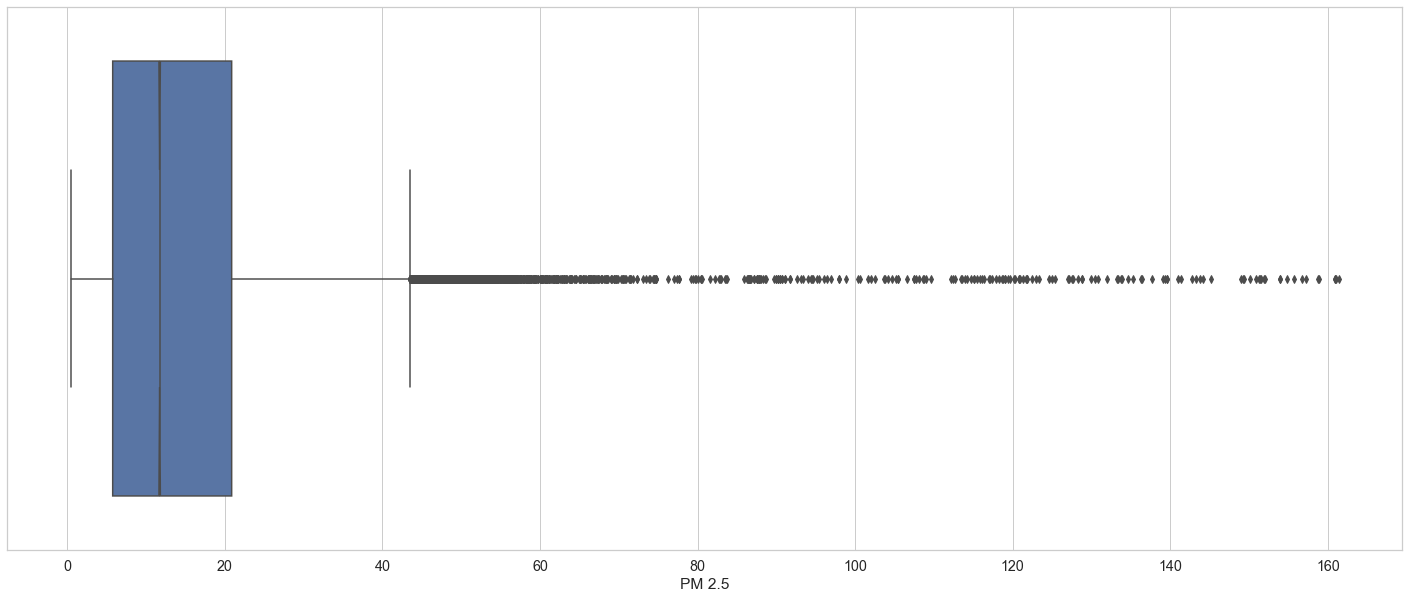

[139.63 136.43 112.67 ...   8.5    9.03  20.63]


 +---------------+--------------+--------------+----------------+---------------+---------------+--------------+--------------+----------------+ 


                     PM 2.5   temp  pressure  humidity  wind_speed  clusters  \
Time_stamp                                                                     
2018-12-31 18:30:53  139.63   7.71      1032       100        3.09         1   
2018-12-31 18:35:01  136.43   7.71      1032       100        3.09         1   
2018-12-31 18:39:09  112.67   7.71      1032       100        3.09         1   
2018-12-31 18:43:17   46.87   7.71      1032       100        3.09         1   
2018-12-31 18:51:32   56.53   7.71      1032       100        3.09         1   
...                     ...    ...       ...       ...         ...       ...   
2020-02-06 17:56:07  155.73   2.84      1030        69        2.10         1   
2020-02-09 08:51:54   50.23   3.84      1013        78        1.00         1   
20

In [37]:
c1 = get_label(c1)

print('\n\n', line,'\n\n')
print(c1[c1['label']=='abnormal'])

checkpoint 1


##########################################
 Number of Z-score Outliers in PM 2.5 are:  1218 
##########################################




 +---------------+--------------+--------------+----------------+---------------+---------------+--------------+--------------+----------------+ 


Number of outliers using quartile method


lower bound:  -5.279999999999999 and Upper bound:  16.08
3863  Number of outliers from  62480 PM 2.5 values


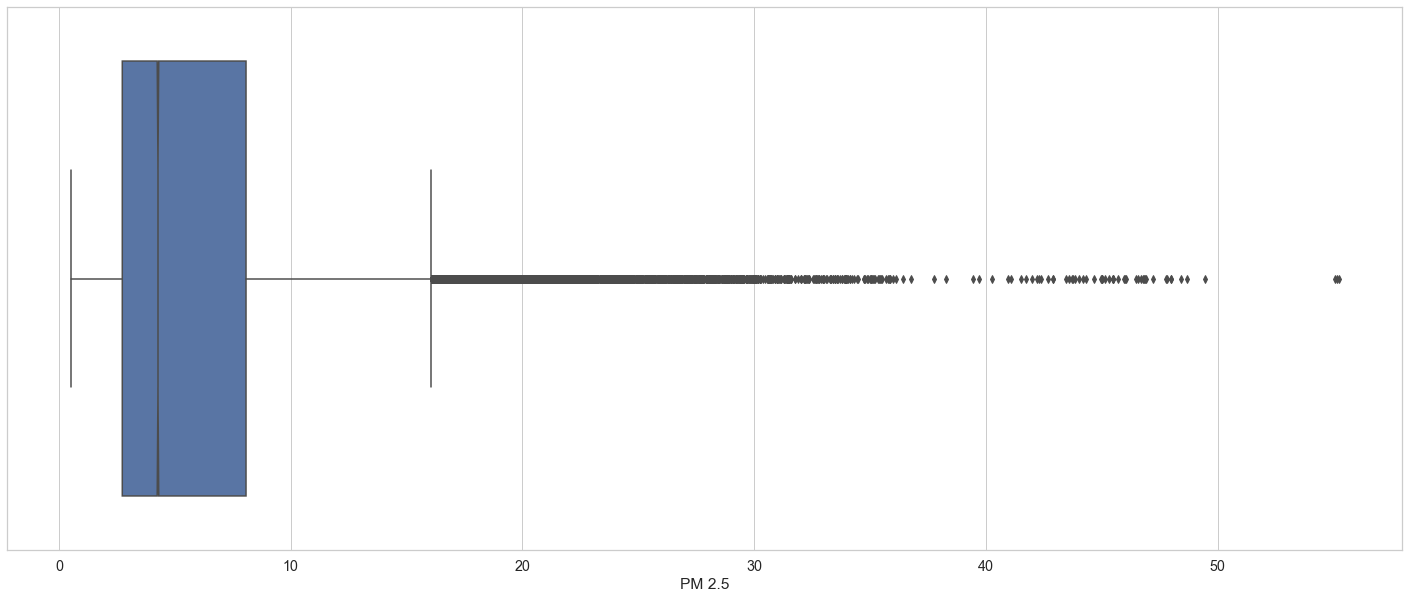

[11.97 11.93 11.43 ...  3.93  4.1   4.4 ]


 +---------------+--------------+--------------+----------------+---------------+---------------+--------------+--------------+----------------+ 


                     PM 2.5  temp  pressure  humidity  wind_speed  clusters  \
Time_stamp                                                                    
2019-01-03 14:04:44   16.93  3.04      1035        75         3.6         2   
2019-01-03 14:13:00   17.03  3.04      1035        75         3.6         2   
2019-01-03 14:58:19   17.17  3.04      1035        75         3.6         2   
2019-01-03 15:02:26   16.87  2.78      1035        75         3.6         2   
2019-01-03 15:06:33   21.97  2.78      1035        75         3.6         2   
...                     ...   ...       ...       ...         ...       ...   
2020-02-19 07:46:32   19.80  5.44      1014        75         7.7         2   
2020-02-19 22:36:59   16.43  3.34      1023        74         2.6         2   
2020-02-26 17:16:0

In [38]:
c2 = get_label(c2)

print('\n\n', line,'\n\n')
print(c2[c2['label']=='abnormal'])

checkpoint 1


##########################################
 Number of Z-score Outliers in PM 2.5 are:  4 
##########################################




 +---------------+--------------+--------------+----------------+---------------+---------------+--------------+--------------+----------------+ 


Number of outliers using quartile method


lower bound:  -52.62749999999997 and Upper bound:  612.1125
8  Number of outliers from  123 PM 2.5 values


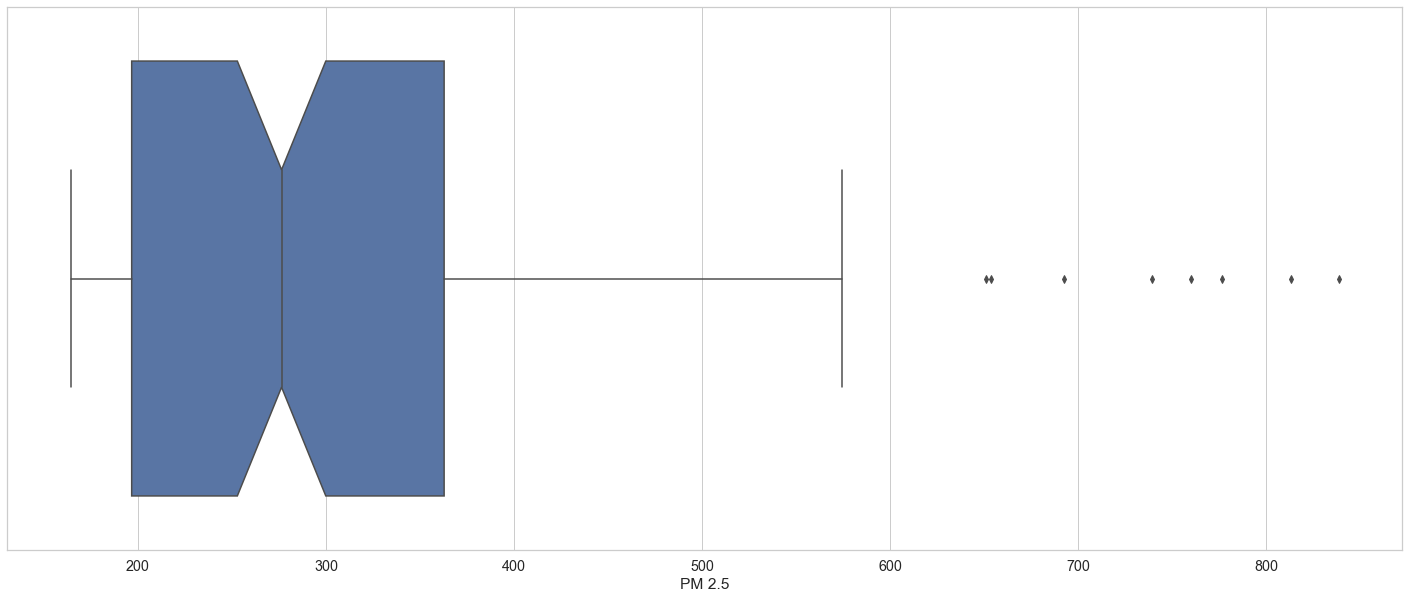

[318.4  574.5  692.73 760.   776.67 813.33 838.67 739.53 653.7  546.4
 477.47 364.9  312.67 284.27 257.8  197.4  566.47 304.8  181.57 203.67
 185.8  164.8  313.37 171.23 262.9  231.4  177.57 276.37 186.77 427.87
 181.83 201.47 215.3  254.4  180.97 378.73 213.13 535.23 442.13 166.32
 178.37 186.2  170.2  195.43 366.87 394.1  402.8  407.33 398.37 218.93
 218.1  309.6  215.17 195.9  180.5  352.87 195.33 529.7  260.53 175.4
 235.97 273.37 348.67 210.47 494.83 189.87 172.03 203.27 292.07 315.07
 380.03 398.2  195.37 245.23 239.23 303.03 230.07 219.13 270.07 210.6
 235.27 228.53 267.17 289.23 326.83 340.1  346.3  365.17 361.77 363.9
 352.73 351.7  328.77 338.43 310.5  329.17 312.27 308.63 307.6  342.93
 376.53 376.07 374.57 290.5  286.33 264.   256.83 255.63 212.37 174.97
 166.93 169.5  168.73 178.53 164.17 164.2  172.9  176.6  325.63 650.9
 179.53 308.67 168.33]


 +---------------+--------------+--------------+----------------+---------------+---------------+--------------+--------------+-

In [39]:
c3 = get_label(c3)

print('\n\n', line,'\n\n')
print(c3[c3['label']=='abnormal'])

In [40]:
frame = pd.concat([c0,c1,c2,c3])

In [41]:
frame = frame.sort_index()
frame

,PM 2.5,temp,pressure,humidity,wind_speed,clusters,label
Time_stamp,,,,,,,
2018-12-31 18:30:53,139.63,7.71,1032,100,3.09,1,abnormal
2018-12-31 18:35:01,136.43,7.71,1032,100,3.09,1,abnormal
2018-12-31 18:39:09,112.67,7.71,1032,100,3.09,1,abnormal
2018-12-31 18:43:17,46.87,7.71,1032,100,3.09,1,abnormal
2018-12-31 18:47:24,38.30,7.71,1032,100,3.09,1,normal
...,...,...,...,...,...,...,...
2020-02-28 18:11:12,3.93,6.00,1013,56,3.60,2,normal
2020-02-28 18:14:31,4.33,6.00,1013,56,3.60,2,normal
2020-02-28 18:21:01,3.93,6.00,1013,56,3.60,2,normal


### EVALUATION METRICS

CALCULATE ACCURACY, PRECISION, RECAAL AND F1 SCORE

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

obt_label = frame['label']
gold_label = df1['label']
testy = obt_label
yhat_classes = gold_label

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(testy, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(testy, yhat_classes, pos_label = 'abnormal')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(testy, yhat_classes, pos_label = 'abnormal')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(testy, yhat_classes, pos_label = 'abnormal')
print('F1 score: %f' % f1)
cm = confusion_matrix(testy, yhat_classes)
print('Confusion matrix: \n', cm)

Accuracy: 0.923797
Precision: 0.232429
Recall: 0.267757
F1 score: 0.248845
Confusion matrix: 
 [[  2047   5598]
 [  6760 147768]]
